# Generate the Intron bed6

moved to make_intron_bed.ipynb 2019/03/04
this is the older ver.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(100)
%matplotlib inline

import pybedtools as pb
from tqdm import tqdm_notebook as tqdm

In [7]:
# exon_count(htseq)の最小tag数
th = 10

f_bam = 'bam/84_DP_RamDA_test.accept.sort.bam'
f_gtf = 'ref/mm10_genes.gtf'
f_bed_intron = 'ref/mm10_genes_intron.bed'
f_out = 'intron_count/84_DP_RamDA.csv'

In [3]:
!head ref/mm10_genes.gtf

chr1	unknown	exon	3214482	3216968	.	-	.	gene_id "Xkr4"; gene_name "Xkr4"; p_id "P15391"; transcript_id "NM_001011874"; tss_id "TSS27105";
chr1	unknown	stop_codon	3216022	3216024	.	-	.	gene_id "Xkr4"; gene_name "Xkr4"; p_id "P15391"; transcript_id "NM_001011874"; tss_id "TSS27105";
chr1	unknown	CDS	3216025	3216968	.	-	2	gene_id "Xkr4"; gene_name "Xkr4"; p_id "P15391"; transcript_id "NM_001011874"; tss_id "TSS27105";
chr1	unknown	CDS	3421702	3421901	.	-	1	gene_id "Xkr4"; gene_name "Xkr4"; p_id "P15391"; transcript_id "NM_001011874"; tss_id "TSS27105";
chr1	unknown	exon	3421702	3421901	.	-	.	gene_id "Xkr4"; gene_name "Xkr4"; p_id "P15391"; transcript_id "NM_001011874"; tss_id "TSS27105";
chr1	unknown	CDS	3670552	3671348	.	-	0	gene_id "Xkr4"; gene_name "Xkr4"; p_id "P15391"; transcript_id "NM_001011874"; tss_id "TSS27105";
chr1	unknown	exon	3670552	3671498	.	-	.	gene_id "Xkr4"; gene_name "Xkr4"; p_id "P15391"; transcript_id "NM_001011874"; tss_id "TSS27105";
chr1	unknown	start_codon	367134

In [4]:
!pwd

/home/yyasumizu/RAID6TB/bioinformatics/mac/SingleCell/ramda


In [5]:
df_gtf = pd.read_table(f_gtf, header=None)
df_gtf.columns = ['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_gtf['symbol'] = df_gtf.attribute.str.split('"').str.get(1)
df_gtf.head()

/home/yyasumizu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,chr,source,feature,start,end,score,strand,frame,attribute,symbol
0,chr1,unknown,exon,3214482,3216968,.,-,.,"gene_id ""Xkr4""; gene_name ""Xkr4""; p_id ""P15391...",Xkr4
1,chr1,unknown,stop_codon,3216022,3216024,.,-,.,"gene_id ""Xkr4""; gene_name ""Xkr4""; p_id ""P15391...",Xkr4
2,chr1,unknown,CDS,3216025,3216968,.,-,2,"gene_id ""Xkr4""; gene_name ""Xkr4""; p_id ""P15391...",Xkr4
3,chr1,unknown,CDS,3421702,3421901,.,-,1,"gene_id ""Xkr4""; gene_name ""Xkr4""; p_id ""P15391...",Xkr4
4,chr1,unknown,exon,3421702,3421901,.,-,.,"gene_id ""Xkr4""; gene_name ""Xkr4""; p_id ""P15391...",Xkr4


In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

l_g = []
for i,g in enumerate(df_gtf.symbol.unique()):
    df_q = df_gtf.query('symbol==@g')

    c = df_q.chr.unique()[0]
    s = df_q.start.min()
    e = df_q.end.max()
    syn = df_q.symbol.unique()[0]
    sc = '.'
    st = df_q.strand.unique()[0]
    
    d = pd.DataFrame([[c,s,e,g,sc,st]])
    g = pb.BedTool.from_dataframe(d)

    try:
        df_int_q = g.subtract(pb.BedTool.from_dataframe(df_q)).to_dataframe()
    except:
        print(syn) # print genes without any intron.
    
    if i == 0:
        df_intron = df_int_q
    
    else:
        df_intron = pd.concat([df_intron, df_int_q])

df_intron.head()

Npbwr1
Rrs1
Snord87
Mir6341
Gm5523
Mir206
Mir133b
4933415F23Rik
Mir30a
Mir30c-2
Gm20172
Mir6342
Pih1d3
Gm9839
Gm5415
1700001G17Rik
Gm15455
Mir6896
Mir5103
AA619741
Mir6897
Mir6898
4930594C11Rik
Mir6349
Snord89
Pou3f3
2900092D14Rik
Dalir
Mir6350
Mir7681
Mars2
Hsfy2
9130024F11Rik
Fzd7
Snord70
Snord11
Snora41
Mir6899
Mir6351
Mir1928
Gpbar1
Mir26b
Cdk5r2
Mir375
Mir6343
Mir6352
Mir6344
Mir6353
Mir5126
Mir8096
Snora75
Gm24148
Snord82
1700019O17Rik
Scarna6
Dnajb3
Arl4c
Mir6900
Olfr1416
Olfr1415
Olfr1413
Olfr1412
Olfr1411
Olfr1410
Olfr12
Mir149
Mir6901
Mir6902
Mir6345
Mir3473f
2900060B14Rik
Mir6346
Tmem185b
Mir128-1
Mir135b
Zbed6
Mir6903
Mir1231
Ascl5
Gpr25
Mir181a-1
Mir181b-1
Mir7682
Teddm2
Teddm1b
Teddm1a
Mir8114
Ier5
Mir488
Scarna3a
Mir1843b
Mir1927
Gpr52
Snord47
Dnm3os
Mir199a-2
Mir214
Mir6347
Mir6348
Mir6546
Alyref2
Mir7683
Pigm
Olfr16
Olfr1408
Olfr1406
Olfr218
Olfr1404
Olfr418
Olfr433
Olfr432
Olfr430
Olfr429
Olfr427
Olfr231
Olfr424
Olfr421-ps1
Olfr420
Olfr419
Olfr417
Olfr248
Olfr414
Olfr

,chrom,start,end,name,score,strand
0,chr1,3216968,3421701,Xkr4,.,-
1,chr1,3421901,3670551,Xkr4,.,-
0,chr1,4293012,4343506,Rp1,.,-
1,chr1,4350091,4351909,Rp1,.,-
2,chr1,4352081,4352201,Rp1,.,-


In [9]:
df_intron.to_csv(f_bed_intron, index=None, sep='\t', header=None)

# Count main

https://daler.github.io/pybedtools/autodocs/pybedtools.bedtool.BedTool.coverage.html?highlight=coverage#pybedtools.bedtool.BedTool.coverage

Default Output:  
After each entry in A, reports: 
    1. The number of features in B that overlapped the A interval.
    2. The number of bases in A that had non-zero coverage.
    3. The length of the entry in A.
    4. The fraction of bases in A that had non-zero coverage.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(100)
%matplotlib inline

import pybedtools as pb
from tqdm import tqdm_notebook as tqdm

In [2]:
f_bam = 'bam/84_DP_RamDA_test.accept.sort.bam'
f_bed_intron = 'ref/mm10_genes_intron.bed'
f_out = 'intron_count/84_DP_RamDA.csv'

In [87]:
ref = pb.BedTool(f_bed_intron)
bam = pb.BedTool(f_bam)
counts = ref.coverage(bam, s=True) # only the same strand

bam_count = bam.count()

df_count = counts.to_dataframe()
df_count.columns = ['chr', 'start', 'end', 'symbol', 'score', 'strand', 'n_overlap', 'len_overlap', 'len', 'frac']

df_count_groupby = df_count.groupby('symbol').sum()
df_count_groupby['symbol'] = df_count_groupby.index

df_count_groupby['rpkm'] = df_count_groupby['n_overlap'] / (df_count_groupby['len'] / 1000) * (bam_count / 1000000)


/home/yyasumizu/anaconda3/lib/python3.6/site-packages/pybedtools/bedtool.py:3292: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  return pandas.read_table(self.fn, names=_names, header=None, *args, **kwargs)


In [85]:
# 84
df_count_groupby.head()

,start,end,n_overlap,len_overlap,len,frac,symbol
symbol,,,,,,,
0610005C13Rik,182288870,182295130,20,6260,6260,4.000000,0610005C13Rik
0610007P14Rik,343274444,343282350,65,2041,7906,1.076748,0610007P14Rik
0610009B22Rik,51686092,51688547,0,0,2455,0.000000,0610009B22Rik
0610009L18Rik,120348862,120350756,4,160,1894,0.084477,0610009L18Rik
0610009O20Rik,459064256,459074233,0,0,9977,0.000000,0610009O20Rik


In [88]:
# 81
df_count_groupby.head()

,start,end,n_overlap,len_overlap,len,frac,symbol
symbol,,,,,,,
0610005C13Rik,182288870,182295130,4,6260,6260,4.000000,0610005C13Rik
0610007P14Rik,343274444,343282350,1,50,7906,0.019857,0610007P14Rik
0610009B22Rik,51686092,51688547,0,0,2455,0.000000,0610009B22Rik
0610009L18Rik,120348862,120350756,0,0,1894,0.000000,0610009L18Rik
0610009O20Rik,459064256,459074233,3,1628,9977,2.000000,0610009O20Rik


In [94]:
df_count_groupby.head()

,start,end,n_overlap,len_overlap,len,frac,symbol,rpkm
symbol,,,,,,,,
0610005C13Rik,182288870,182295130,4,6260,6260,4.000000,0610005C13Rik,1.562115
0610007P14Rik,343274444,343282350,1,50,7906,0.019857,0610007P14Rik,0.309222
0610009B22Rik,51686092,51688547,0,0,2455,0.000000,0610009B22Rik,0.000000
0610009L18Rik,120348862,120350756,0,0,1894,0.000000,0610009L18Rik,0.000000
0610009O20Rik,459064256,459074233,3,1628,9977,2.000000,0610009O20Rik,0.735104


In [108]:
df_count_groupby.len.describe()

count    2.089100e+04
mean     3.913166e+05
std      1.670542e+07
min      1.000000e+00
25%      6.210500e+03
50%      1.788700e+04
75%      4.935250e+04
max      2.316341e+09
Name: len, dtype: float64

In [101]:
df_count_groupby[df_count_groupby.len > 5000].sort_values(by='rpkm', ascending=False).head(40)

,start,end,n_overlap,len_overlap,len,frac,symbol,rpkm
symbol,,,,,,,,
Hexb,1263384731,1263404853,12963,12946,20122,10.690860,Hexb,1574.931703
Arhgap21,500891696,501004527,26798,46143,112831,21.410916,Arhgap21,580.632438
Il31ra,1800674838,1800729026,8243,252,54188,0.017101,Il31ra,371.885741
Tmem56,848578485,848633570,7131,159,55085,0.005801,Tmem56,316.478660
Filip1l,287430817,287646301,26122,155849,215484,3.707441,Filip1l,296.359426
Jarid2,807813500,807998212,20291,138462,184712,15.182166,Jarid2,268.556513
Rsph3b,48396421,48438448,4198,263,42027,0.036177,Rsph3b,244.197601
Rassf8,437441146,437448615,723,7469,7469,3.000000,Rassf8,236.648190
Rsph3a,55771347,55803330,2576,149,31983,0.023859,Rsph3a,196.903760


In [110]:
f_out_prefix = 'intron_count/test'
df_count_groupby[['symbol', 'rpkm']].to_csv(f_out_prefix+'RPKM.txt', index=None, header=None, sep='\t')
df_count_groupby[['symbol', 'n_overlap']].to_csv(f_out_prefix+'count.txt', index=None, header=None, sep='\t')

In [86]:
f_bam = 'bam/81_DP_RamDA_test.accept.sort.bam'
f_bed_intron = 'ref/mm10_genes_intron.bed'
f_out = 'intron_count/84_DP_RamDA.csv'

In [84]:
df_count_groupby['symbol'] = df_count_groupby.index

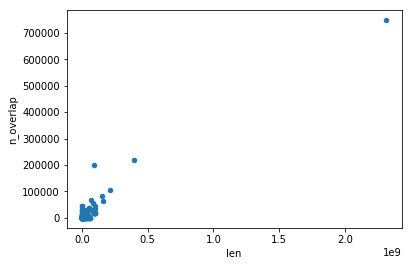

In [29]:
df_count_groupby.plot.scatter(x='len', y='n_overlap')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
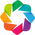

In [32]:
import holoviews as hv
hv.extension('bokeh')

In [79]:
%%output filename="test"
hv.Scatter(df_count_groupby, kdims=['len','n_overlap']).opts(
    width=1000,height=1000, tools=['hover'], logx=True, logy=True, xlim=(10, 100000000), ylim=(1, 10000000))


:Scatter   [len,n_overlap]   (start,end,len_overlap,frac,symbol)

In [72]:
df_count_groupby.loc['Satb1']

start          673289376
end            673379692
n_overlap           4596
len_overlap        90316
len                90316
frac                  13
symbol             Satb1
Name: Satb1, dtype: object